# Avaliando Modelo de Regressão

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [2]:
def relative_error(y_true, y_pred):
    true_total = np.sum(y_true)
    pred_total = np.sum(y_pred)
    return (pred_total - true_total)/true_total

In [3]:

# carregando valores previstos
y_pred = np.load('./data/y_pred.npy')

# carregando valores de teste
test_set = np.load('./data/test_set.npy')
y_test = test_set[:,-1]

# carregando iterações do boosting (métrica avaliada)
boosting_steps = np.load('./data/eval_boosting_steps.npy')

# carregando valores originais (mortes acumulas)
data = pd.read_pickle('./data/dataframes/us_historical.pkl') \
        .assign(date = lambda df: df['date'].apply(pd.Period)) \
        .set_index('date').sort_index() \
        .loc['dec-2020', ['death', 'deathIncrease']]

In [4]:
# Erro relativo no numero de mortos previstos para dezembro
print('%.2f%%'%(100*relative_error(y_test, y_pred)))

-8.78%


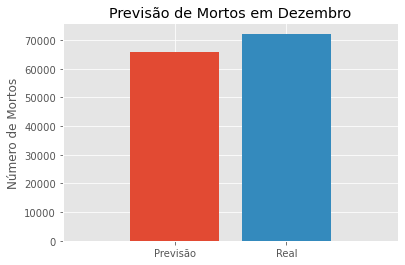

In [5]:
# Visualizando previsão do total de mortos

plt.bar(1, np.sum(y_pred))
plt.bar(2, np.sum(y_test))
plt.xticks([1, 2], labels=['Previsão', 'Real'])
plt.ylabel('Número de Mortos')
plt.xlim(0, 3)
plt.title('Previsão de Mortos em Dezembro')
plt.savefig('./data/imgs/previsao_total.png')

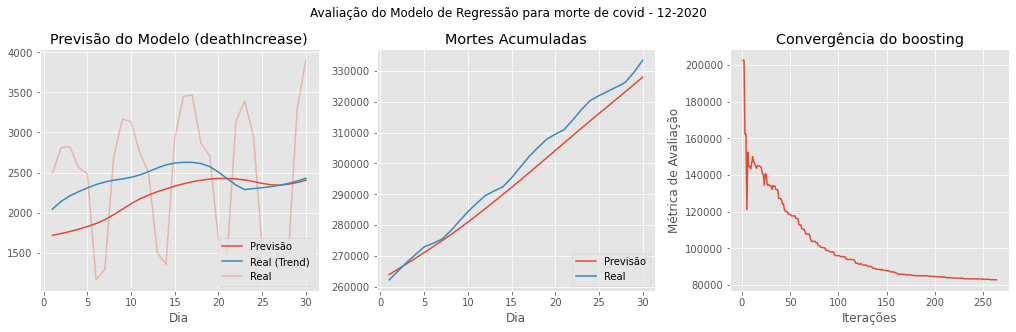

In [6]:
# Visualizando características do modelo

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4.5), constrained_layout=True)
xs = np.arange(len(y_pred))+1
ax1.plot(xs, y_pred, label='Previsão')
ax1.plot(xs, y_test, label='Real (Trend)')
ax1.plot(xs, data['deathIncrease'].values[:-1], label='Real', color='C0', alpha=.3)
ax1.set_xlabel('Dia')
ax1.set_title('Previsão do Modelo (deathIncrease)')

ax2.plot(xs, data['death'].values[0]+np.cumsum(y_pred), label='Previsão')
ax2.plot(xs, data['death'].values[:-1], label='Real')
ax2.set_xlabel('Dia')
ax2.set_title('Mortes Acumuladas')

ax3.plot(*zip(*enumerate(boosting_steps, 1)))
ax3.set_xlabel('Iterações')
ax3.set_title('Convergência do boosting')
ax3.set_ylabel('Métrica de Avaliação')

fig.suptitle('Avaliação do Modelo de Regressão para morte de covid - 12-2020')
ax1.legend(loc=4)
ax2.legend(loc=4)
fig.savefig('data/imgs/model_performance.png', bbox_inches='tight')